<a href="https://colab.research.google.com/github/shwetha729/Quantum-research/blob/lvl0/E91_Finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Quantum Cryptography: A Deeper Look at E91** -->

---




## **Part 0:** Introduction & Imports
###In this practice, we will code the E91 Cryptography protocol!

There are a few new `Qiskit` things you will start to explore for this challenge:

1. Creating circuits with registers
2. S & T gates 

**Goal:** 
Using our good friends Alice, Bob, and Charlie we will securely transfer  $|\Psi \rangle$ (basically a quantum state) from Alice to Bob and even detect when Eve has tampered with their system!

**This *quantum cryptographic* method is called E91.**





<img src="https://media.giphy.com/media/znFOMXuHVkV36qzdbJ/giphy.gif" width="200" align="center">














In [ ]:
#start with our imports 

import numpy as np
import random
import re

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.visualization import circuit_drawer, plot_histogram

### **Provided Functions, Cheat Sheets & Extra Readings**

Along with our imports the following functions in this challenge are also provided for you further in this notebook: 

*   The `chsh_corr(result):` which is a function using the CHSH test to compare Bell states. 

* The `abs_pattern` list: this uses `re` or regular expressions to compare between Alice & Bob in the classical channel. 

* [Qiskit](https://docs.google.com/document/d/1WKvv22SC7pA0TCqCJnxgZOf2tHjvTotaHYEtOx2FNkI/edit?usp=share_link)
* [Quantum Key Distribution ](https://en.wikipedia.org/wiki/Quantum_key_distribution)
* General Overview of E91 Protocol without code

Let's get started! [Head over to the IQX Platform ](https://https://lab.quantum-computing.ibm.com) to begin running on IBM's quantum system. 




---

## **Part 1:** Setting up Alice, Bob, & Charlie
Setting up the E91 protocol simulation with Alice, Bob, & Charlie.  

In this section we simulate the E91 quantum key distribution protocol *without* the presence of an eavesdropper.

### *1. Creating the entangled bell state*

In the first step Alice and Bob receive their qubits of the quantum states $\lvert\psi_s\rangle$ created by Charlie.

For our simulation, we need registers with two quantum bits and four classical bits.

Side note: to read more about what a singlet state, you can read more about it [here](https://en.wikipedia.org/wiki/Singlet_state#:~:text=In%20quantum%20mechanics%2C%20a%20singlet,line%20of%20a%20singlet%20state.)! 

In [ ]:
# Creating registers
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

#qr means quantum register
#cr means classical register



In [ ]:
#receive singlet states
ep_bell_state = QuantumCircuit(qr, cr, name='ep_bell_state')
ep_bell_state.x(qr[0])
ep_bell_state.x(qr[1])
ep_bell_state.h(qr[0])
ep_bell_state.cx(qr[0],qr[1])

#side note: singlet is a physics/optics term 
#-- but here we can also define singlet as  entangled pair or a bell state

Qubits *qr\[0\]* and *qr\[1\]* are now entangled.
After creating a singlet state/entangled bell state, Charlie sends qubit *qr\[0\]* to Alice and qubit *qr\[1\]* to Bob.
![](images/singlet_device.png)

**Exercise 1**: Draw the output circuit

In [ ]:
ep_bell_state.draw()

### *#2. Measuring*

First let us prepare the measurements which will be used by Alice and Bob.

To perform these measurements, the standard basis $Z$ must be rotated to the proper basis when it is needed (see [Superposition](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/002-The_Weird_and_Wonderful_World_of_the_Qubit/020-Superposition.html) and [Entanglement and Bell Tests](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/003-Multiple_Qubits_Gates_and_Entangled_States/050-Entanglement_and_Bell_Tests.html) user guides).
Here we define the notation of possible measurements of Alice and Bob: 
![](images/bases.png)

Blocks on the left side can be considered as *detectors* used by the participants to measure $X, W, Z$ and $V$ observables.
Now we prepare the corresponding curcuits.

Here we introduce: 


*   S Gate
*   T Gate 

These are just specific types of the Z gate rotations that we learned about in class. While Z gates with a specified rotation value **could also be used**, we use the S and T gate notation to keep the code readable. 

For more info on how the Z, S, & T gates relate to each other, check out this [article](https://medium.com/arnaldo-gunzi-quantum/z-s-and-t-gates-499703d0937f)!


#### **Alice's Measurement Circuit**

Here we are creating Alice's circuit that would be use in the E91 protocol

In [ ]:
## Alice's measurement circuits

# measure the spin projection of Alice's qubit onto the a_1 direction (X basis)
measureA1 = QuantumCircuit(qr, cr, name='measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0],cr[0])

# measure the spin projection of Alice's qubit onto the a_2 direction (W basis)
measureA2 = QuantumCircuit(qr, cr, name='measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])

# measure the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)
measureA3 = QuantumCircuit(qr, cr, name='measureA3')
measureA3.measure(qr[0],cr[0])


#### **Bob's Measurement Circuit**

Here we are creating Bob's circuit that would be use in the E91 protocol.

In [ ]:
## Bob's measurement circuits

# measure the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureB1 = QuantumCircuit(qr, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_2 direction (standard Z basis)
measureB2 = QuantumCircuit(qr, cr, name='measureB2')
measureB2.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_3 direction (V basis)
measureB3 = QuantumCircuit(qr, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

## Lists of measurement circuits
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

#### **Generate Secret Key**

Here we are creating Alice's circuit that would be use in the E91 protocolSuppose Alice and Bob want to generate a secret key using $N$ entangled Bell states prepared by Charlie. 



In [ ]:
# Define the number of singlets N
numberOfBellStates = 500

The participants must choose the directions onto which they will measure the spin projections of their qubits.
To do this, Alice and Bob create strings with randomly generated elements.

In [ ]:
aliceMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b' of Bob

Now we combine Charlie's device and Alice's and Bob's detectors into one circuit (Charlie's Bell State + Alice's measurement + Bob's measurement).

In [ ]:
circuits = [] # the list in which the created circuits will be stored

for i in range(numberOfSinglets):
    # create the name of the i-th circuit depending on Alice's and Bob's measurement choices
    circuitName = str(i) + ':A' + str(aliceMeasurementChoices[i]) + '_B' + str(bobMeasurementChoices[i])
    
    # create the joint measurement circuit
    # add Alice's and Bob's measurement circuits to the singlet state curcuit
    # singlet state circuit # measurement circuit of Alice # measurement circuit of Bob
    circuitName = singlet + aliceMeasurements[aliceMeasurementChoices[i]-1] + bobMeasurements[bobMeasurementChoices[i]-1] 
    
    # add the created circuit to the circuits list
    circuits.append(circuitName)

Let us look at the name of one of the prepared circuits.

In [ ]:
print(circuits[0].name)

circuit8


**Exercise 2**: Try to print out other registers in the circuit 

In [ ]:
print(circuits[1].name)

### *#3. Recording the Results*

Now let's execute the circuits on the simulator. 

In [ ]:
backend=BasicAer.get_backend('qasm_simulator')
result = execute(circuits, backend=backend, shots=1).result()  
#print(result) # uncomment for detailed result

Look at the output of the execution of the first circuit.

In [ ]:
result.get_counts(circuits[0])

{'0011': 1}

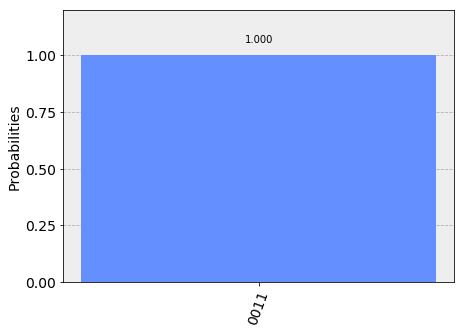

In [ ]:
plot_histogram(result.get_counts(circuits[0]))

It consists of four digits.
Recall that Alice and Bob store the results of the measurement in classical bits *cr\[0\]* and *cr\[1\]* (two digits on the right).
Since we model the secret key generation process without the presence of an eavesdropper, the classical bits *cr\[2\]* and *cr\[3\]* are always 0.
Also note that the output is the Python dictionary, in which the keys are the obtained results, and the values are the counts.



---

## **Part 2: Verify E91 Protocol**

Reveal & Verify our protocol using the CHSH Correlation Value test. To learn more about the CHSH inequality, click [here!](https://en.wikipedia.org/wiki/CHSH_inequality) 

Basically, we want to now prove that our bell states cannot be tampered with using this test. 

### *#1. Function for checking secret key & mismatched bits*


**Why?** In the previous step we have stored the measurement results of Alice and Bob in the *aliceResults* and *bobResults* lists. 
Now the participants compare their strings $b$ and $b^{'}$ via **the public classical** channel.
If Alice and Bob have measured the spin projections of their qubits of the Nth bell state onto the same direction, then Alice records the result $a_i$ as the bit of the string $k$, and Bob records the result $-a_i$ as the bit of the string $k^{'}$.



In [ ]:
abPatterns = [
    re.compile('..00$'), # search for the '..00' output (Alice obtained -1 and Bob obtained -1)
    re.compile('..01$'), # search for the '..01' output
    re.compile('..10$'), # search for the '..10' output (Alice obtained -1 and Bob obtained 1)
    re.compile('..11$')  # search for the '..11' output
]

aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

for i in range(numberOfSinglets):

    res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit
    
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are -1,-1)
        aliceResults.append(-1) # Alice got the result -1 
        bobResults.append(-1) # Bob got the result -1
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(-1)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are -1,1)
        aliceResults.append(-1) # Alice got the result -1 
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res): 
        aliceResults.append(1)
        bobResults.append(1)

aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'

# comparing the stings with measurement choices
for i in range(numberOfSinglets):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(- bobResults[i]) # record the multiplied by -1 i-th result obtained Bob as the bit of the secret key k'
        
keyLength = len(aliceKey) # length of the secret key 
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1      

Note that since the strings $k$ and $k^{'}$ are secret, Alice and Bob have no information about mismatches in the bits of their keys.
To find out the number of errors, the participants can perform a random sampling test.
Alice randomly selects $\delta$ bits of her secret key and tells Bob which bits she selected.
Then Alice and Bob compare the values of these check bits.


### *#2. CHSH correlation value test*

This function is primarily given below. 

In [ ]:
#we can prove this with CSHS correlation value test 
# function that calculates CHSH correlation value

def chsh_corr(result):
    
    # lists with the counts of measurement results
    # each element represents the number of (-1,-1), (-1,1), (1,-1) and (1,1) results respectively
    countA1B1 = [0, 0, 0, 0] # XW observable
    countA1B3 = [0, 0, 0, 0] # XV observable
    countA3B1 = [0, 0, 0, 0] # ZW observable
    countA3B3 = [0, 0, 0, 0] # ZV observable

    for i in range(numberOfSinglets):

        res = list(result.get_counts(circuits[i]).keys())[0]

        # if the spins of the qubits of the i-th singlet were projected onto the a_1/b_1 directions
        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B1[j] += 1

        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B3[j] += 1

        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B1[j] += 1
                    
        # if the spins of the qubits of the i-th singlet were projected onto the a_3/b_3 directions
        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B3[j] += 1
                    
    # number of the results obtained from the measurements in a particular basis
    total11 = sum(countA1B1)
    total13 = sum(countA1B3)
    total31 = sum(countA3B1)
    total33 = sum(countA3B3)      
                    
    # expectation values of XW, XV, ZW and ZV observables (2)
    expect11 = (countA1B1[0] - countA1B1[1] - countA1B1[2] + countA1B1[3])/total11 # -1/sqrt(2)
    expect13 = (countA1B3[0] - countA1B3[1] - countA1B3[2] + countA1B3[3])/total13 # 1/sqrt(2)
    expect31 = (countA3B1[0] - countA3B1[1] - countA3B1[2] + countA3B1[3])/total31 # -1/sqrt(2)
    expect33 = (countA3B3[0] - countA3B3[1] - countA3B3[2] + countA3B3[3])/total33 # -1/sqrt(2) 
    
    corr = expect11 - expect13 + expect31 + expect33 # calculate the CHSC correlation value (3)
    
    return corr

Now let us print all the interesting values.

In [ ]:
#print the correlation 

corr = chsh_corr(result) # CHSH correlation value

# CHSH inequality test
print('CHSH correlation value: ' + str(round(corr, 3)))

# Keys
print('Length of the key: ' + str(keyLength))
print('Number of mismatching bits: ' + str(abKeyMismatches) + '\n')

Output: `CHSH correlation value: -2.612
Length of the key: 112
Number of mismatching bits: 0`

### WHAT DOES THIS MEAN?
If any bits are mismatching, this will let you know. Remember that: 

* Since we simulate the E91 protocol without the presence of Eve, the CHSH correlation value should be close to 
 $-2\sqrt{2} \approx -2.828$.. In addition, there should be no mismatching bits in the keys of Alice and Bob. 


 
 * Note also that there are 9 possible combinations of measurements that can be performed by Alice and Bob, but only 2 of them give the results using which the secret keys can be created.
Thus, the ratio of the length of the keys to the number of EP bell states (also known singlets) as  $N$ should be close to $2/9$.

---

## **Part 3: ENTER EVE**
Suppose some third party wants to interfere in the communication session of Alice and Bob and obtain a secret key. The eavesdropper can use the intercept-resend attacks: Eve intercepts one or both of the entangled qubits prepared by Charlie, measures the spin projections of these qubits, prepares new ones depending on the results obtained (
 or 
) and sends them to Alice and Bob. A schematic representation of this process is shown in the figure below.

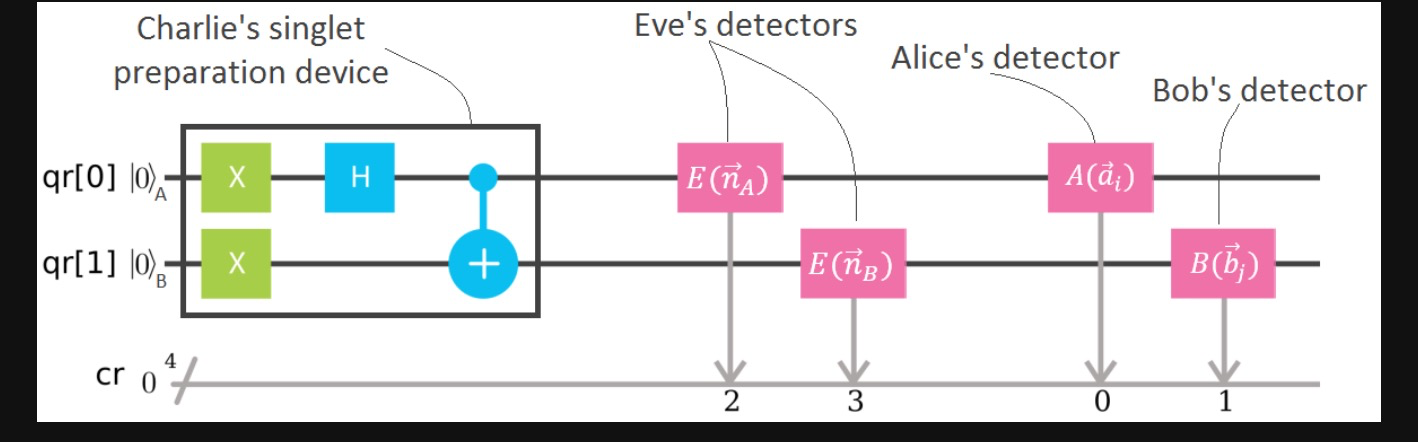

### *#1. Eve's Interception*



#### **Eve measures Alice**

Here we are creating Eve's circuit that would be used in the E91 protocol.

In [ ]:
# measurement of the spin projection of Alice's qubit onto the a_2 direction (W basis)
measureEA2 = QuantumCircuit(qr, cr, name='measureEA2')
measureEA2.s(qr[0])
measureEA2.h(qr[0])
measureEA2.t(qr[0])
measureEA2.h(qr[0])
measureEA2.measure(qr[0],cr[2])

# measurement of the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)
measureEA3 = QuantumCircuit(qr, cr, name='measureEA3')
measureEA3.measure(qr[0],cr[2])



#### **Eve measures Bob**

Here we are creating Eve's circuit that would be use in the E91 protocol

In [ ]:
# measurement of the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureEB1 = QuantumCircuit(qr, cr, name='measureEB1')
measureEB1.s(qr[1])
measureEB1.h(qr[1])
measureEB1.t(qr[1])
measureEB1.h(qr[1])
measureEB1.measure(qr[1],cr[3])

# measurement of the spin projection of Bob's qubit onto the b_2 direction (standard Z measurement)
measureEB2 = QuantumCircuit(qr, cr, name='measureEB2')
measureEB2.measure(qr[1],cr[3])

# lists of measurement circuits
eveMeasurements = [measureEA2, measureEA3, measureEB1, measureEB2]


In [ ]:
# list of Eve's measurement choices
# the first and the second elements of each row represent the measurement of Alice's and Bob's qubits by Eve respectively
eveMeasurementChoices = []

for j in range(numberOfBellStates):      
    if random.uniform(0, 1) <= 0.5: # in 50% of cases perform the WW measurement
        eveMeasurementChoices.append([0, 2])
    else: # in 50% of cases perform the ZZ measurement
        eveMeasurementChoices.append([1, 3])



**Eve begins measurement**. 
Just like before with Alice & Bob, Eve must now also choose the directions she will measure spin projections of the qubits! This is done blow. 

In [ ]:
# list of Eve's measurement choices
# the first and the second elements of each row represent the measurement of Alice's and Bob's qubits by Eve respectively
eveMeasurementChoices = []

for j in range(numberOfBellStates):      
    if random.uniform(0, 1) <= 0.5: # in 50% of cases perform the WW measurement
        eveMeasurementChoices.append([0, 2])
    else: # in 50% of cases perform the ZZ measurement
        eveMeasurementChoices.append([1, 3])

In [ ]:
circuits = [] # the list in which the created circuits will be stored

for j in range(numberOfBellStates):
    # create the name of the j-th circuit depending on Alice's, Bob's and Eve's choices of measurement
    circuitName = str(j) + ':A' + str(aliceMeasurementChoices[j]) + '_B' + str(bobMeasurementChoices[j] + 2) + '_E' + str(eveMeasurementChoices[j][0]) + str(eveMeasurementChoices[j][1] - 1)
    
    # create the joint measurement circuit
    # add Alice's and Bob's measurement circuits to the singlet state curcuit
    # singlet state circuit # Eve's measurement circuit of Alice's qubit # Eve's measurement circuit of Bob's qubit # measurement circuit of Alice # measurement circuit of Bob
    circuitName = ep_bell_state + eveMeasurements[eveMeasurementChoices[j][0]-1] + eveMeasurements[eveMeasurementChoices[j][1]-1] + aliceMeasurements[aliceMeasurementChoices[j]-1] +  bobMeasurements[bobMeasurementChoices[j]-1]
    
    # add the created circuit to the circuits list
    circuits.append(circuitName)

**Eve executes on quantum hardware**. 
Just like before with Alice & Bob, Eve must now also choose the directions she will measure spin projections of the qubits! This is done blow. 

In [ ]:
# & that's the program! run it on the backend 
backend=BasicAer.get_backend('qasm_simulator')
result = execute(circuits, backend=backend, shots=1).result()
# print(result) # uncomment for detailed result

In [ ]:
print(str(circuits[0].name) + '\t' + str(result.get_counts(circuits[0])))


This will output `circuit1514	{'0100': 1}`

In [ ]:
plot_histogram(result.get_counts(circuits[0]))


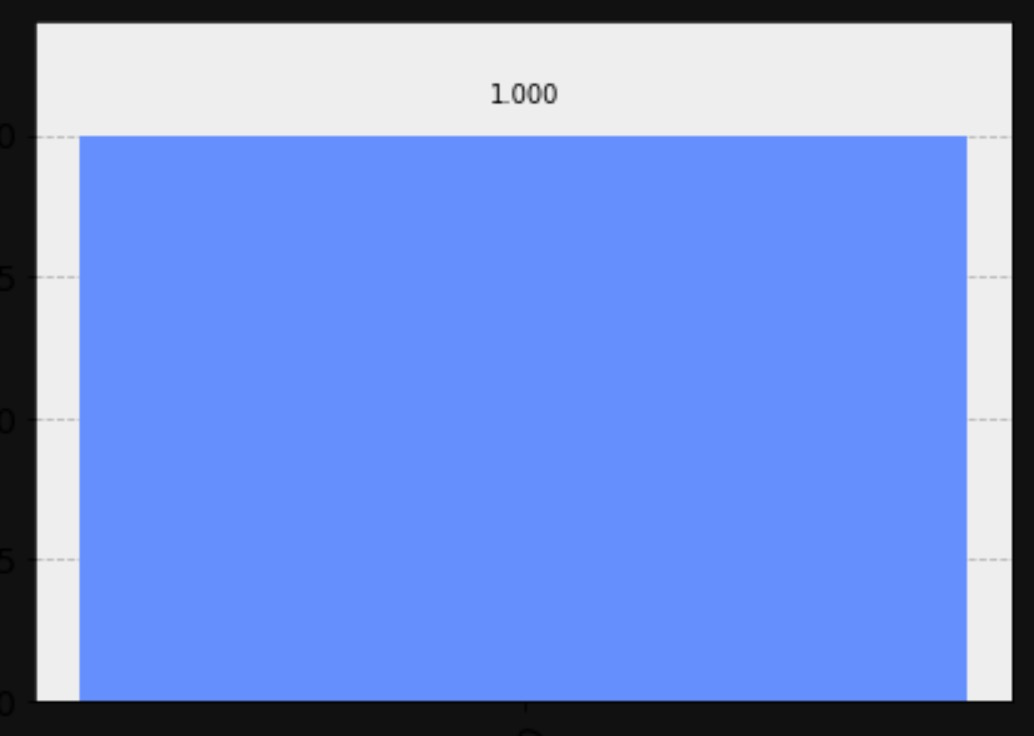

### *#2. The full program*



 Eve's extracts the results from the outputs by doing the following: 

In [ ]:
ePatterns = [
    re.compile('00..$'), # search for the '00..' result (Eve obtained the results -1 and -1 for Alice's and Bob's qubits)
    re.compile('01..$'), # search for the '01..' result (Eve obtained the results 1 and -1 for Alice's and Bob's qubits)
    re.compile('10..$'),
    re.compile('11..$')  
]

**Simulate full program with Alice, Bob, & now Eve**. 
Just like before with Alice & Bob, Eve must now also choose the directions she will measure spin projections of the qubits! This is done blow. The full program where Alice, Bob, and Eve record the results of their measurements. 

In [ ]:
aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

# list of Eve's measurement results
# the elements in the 1-st column are the results obtaned from the measurements of Alice's qubits
# the elements in the 2-nd column are the results obtaned from the measurements of Bob's qubits
eveResults = [] 

# recording the measurement results
for j in range(numberOfSinglets):
    
    res = list(result.get_counts(circuits[j]).keys())[0] # extract a key from the dict and transform it to str
    
    # Alice and Bob
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are -1,-1)
        aliceResults.append(-1) # Alice got the result -1 
        bobResults.append(-1) # Bob got the result -1
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(-1)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are -1,1)
        aliceResults.append(-1) # Alice got the result -1 
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res): 
        aliceResults.append(1)
        bobResults.append(1)

    # Eve
    if ePatterns[0].search(res): # check if the key is '00..'
        eveResults.append([-1, -1]) # results of the measurement of Alice's and Bob's qubits are -1,-1
    if ePatterns[1].search(res):
        eveResults.append([1, -1])
    if ePatterns[2].search(res):
        eveResults.append([-1, 1])
    if ePatterns[3].search(res):
        eveResults.append([1, 1])

aliceKey = [] # Alice's key string a
bobKey = [] # Bob's key string a'
eveKeys = [] # Eve's keys; the 1-st column is the key of Alice, and the 2-nd is the key of Bob

# comparing the strings with measurement choices (b and b')
for j in range(numberOfSinglets):
    # if Alice and Bob measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[j] == 2 and bobMeasurementChoices[j] == 1) or (aliceMeasurementChoices[j] == 3 and bobMeasurementChoices[j] == 2):  
        aliceKey.append(aliceResults[j]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(-bobResults[j]) # record the multiplied by -1 i-th result obtained Bob as the bit of the secret key k'
        eveKeys.append([eveResults[j][0], -eveResults[j][1]]) # record the i-th bits of the keys of Eve 

keyLength = len(aliceKey) # length of the secret skey

abKeyMismatches = 0 # number of mismatching bits in the keys of Alice and Bob
eaKeyMismatches = 0 # number of mismatching bits in the keys of Eve and Alice
ebKeyMismatches = 0 # number of mismatching bits in the keys of Eve and Bob

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]: 
        abKeyMismatches += 1
    if eveKeys[j][0] != aliceKey[j]:
        eaKeyMismatches += 1
    if eveKeys[j][1] != bobKey[j]:
        ebKeyMismatches += 1

eaKnowledge = (keyLength - eaKeyMismatches)/keyLength # Eve's knowledge of Bob's key
ebKnowledge = (keyLength - ebKeyMismatches)/keyLength # Eve's knowledge of Alice's key



### *#3. Executing the CHSH Test*


**RUN THE CHSH FUNCTION ON THE THIRD PARTY!**

In [ ]:
corr = chsh_corr(result)

# CHSH inequality test
print('CHSH correlation value: ' + str(round(corr, 3)) + '\n')

# Keys
print('Length of the key: ' + str(keyLength))
print('Number of mismatching bits: ' + str(abKeyMismatches) + '\n')

print('Eve\'s knowledge of Alice\'s key: ' + str(round(eaKnowledge * 100, 2)) + ' %')
print('Eve\'s knowledge of Bob\'s key: ' + str(round(ebKnowledge * 100, 2)) + ' %')

Output: 


```
CHSH correlation value: -1.821

Length of the key: 112
Number of mismatching bits: 11

Eve's knowledge of Alice's key: 94.64 %
Eve's knowledge of Bob's key: 91.96 %
```



## **Part 4: Conclusion - You detected Eve!**




#### **What does this mean?**

Due to Eve's interference in the communication session, the CHSH correlation value is far away from $-2 \sqrt{2}$.

Alice and Bob see it and will not use the secret key to encrypt and decrypt any messages. The more Eve interferes in the communication session, the more she knows about the secret keys.
But at the same time, the deviation of the CHSH correlation value from $-2\sqrt{2}$ also increases.

We can see that there are mismatches in the keys of Alice and Bob. Eve has been present!

 Alice & Bob can now say hello to Eve, but they internally choose to change their secret key. 🙂

<img src="https://media.giphy.com/media/l0MYsxZiDtc1wPHmU/giphy.gif" width="200" align="center">